In [1]:
import rasterio
import os
import glob
import pandas as pd
from PIL import Image
from numpy import asarray
import numpy as np
from scipy import stats
import matplotlib as plt
import cv2

In [2]:
# Get files
dir_spot = "/home/simon/CDE_UBS/thesis/data_collection/spot6/"
dir_sen = "/home/simon/CDE_UBS/thesis/data_collection/sen2/merged_reprojected/"

def find_files(path,critera):
    search_term = os.path.join(path, critera)
    files = glob.glob(search_term)
    return(files)

In [3]:
def get_stats(filepaths):
    counter = 0
    file_stats_dict = []
    file_stats_ls = []
    
    for file in filepaths:
        stats_file_dict = {}
        stats_file_ls = {}
        
        try:
            with rasterio.open(file, 'r') as ds:
                arr = ds.read()  # read all raster values
                arr = np.transpose(arr, (1,2,0))
        except:
            pass
        
        # catch errors for faulty images(?)
        try:
            b1 = arr[:,:,0].flatten()
            b2 = arr[:,:,1].flatten()
            b3 = arr[:,:,2].flatten()

            # remove invalid data
            b1 = b1[(b1 > 0) & (b1 <= 9999)]
            b2 = b2[(b2 > 0) & (b2 <= 9999)]
            b3 = b3[(b3 > 0) & (b3 <= 9999)]

            # append to return dict
            stats_file_dict["b1"] = [len(b1),int(np.sum(b1)),round(np.nanmean(b1),3),round(np.nanstd(b1),3)]
            stats_file_dict["b2"] = [len(b2),int(np.sum(b2)),round(np.nanmean(b2),3),round(np.nanstd(b2),3)]
            stats_file_dict["b3"] = [len(b3),int(np.sum(b3)),round(np.nanmean(b3),3),round(np.nanstd(b3),3)]
            file_stats_dict.append(stats_file_ls)
            # append everyting to return ls (for potential pd df)
            file_stats_ls.append([file,"B1",len(b1),int(np.sum(b1)),round(np.nanmean(b1),3),round(np.nanstd(b1),3)])
            file_stats_ls.append([file,"B2",len(b2),int(np.sum(b2)),round(np.nanmean(b2),3),round(np.nanstd(b2),3)])
            file_stats_ls.append([file,"B3",len(b3),int(np.sum(b3)),round(np.nanmean(b3),3),round(np.nanstd(b3),3)])
            
        except IndexError:
            pass
       
    # print progress
        counter = counter+1
        print(counter,"/",len(filepaths)," finished                ",end="\r")
        
        """
        # implement early stop for testing
        if counter==5:
            print("\nearly stop")
            return(pd.DataFrame(pd.DataFrame(file_stats_ls,columns=["path","band","len","sum","mean","stdev"])))
        """
    return(pd.DataFrame(pd.DataFrame(file_stats_ls,columns=["path","band","len","sum","mean","stdev"])))

In [8]:
# find files
files_spot = find_files(dir_spot,"*.jp2")
files_sen  = find_files(dir_sen,"*.tif")


# claculate stats and save
#stats_spot = get_stats(files_spot)
#stats_spot.to_pickle("stats_spot.pkl")
stats_sen = get_stats(files_sen)
stats_sen.to_pickle("stats_sen.pkl")

<AxesSubplot:>

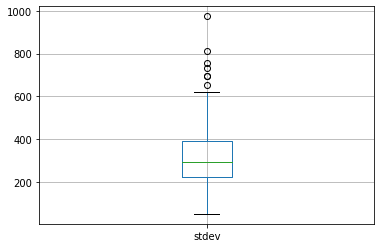

In [9]:
stats_sen = pd.read_pickle("stats_sen.pkl")
stats_spot = pd.read_pickle("stats_spot.pkl")

In [10]:
stats_sen

,path,band,len,sum,mean,stdev
0,/home/simon/CDE_UBS/thesis/data_collection/sen...,B1,118243561,51760122191,437.742,389.987
1,/home/simon/CDE_UBS/thesis/data_collection/sen...,B2,120413818,69953550975,580.943,257.285
2,/home/simon/CDE_UBS/thesis/data_collection/sen...,B3,117783324,32690822430,277.551,212.205
3,/home/simon/CDE_UBS/thesis/data_collection/sen...,B1,99465448,43104024603,433.357,259.089
4,/home/simon/CDE_UBS/thesis/data_collection/sen...,B2,99465501,48394600500,486.547,223.435
...,...,...,...,...,...,...
373,/home/simon/CDE_UBS/thesis/data_collection/sen...,B2,22903149,14535312636,634.643,233.551
374,/home/simon/CDE_UBS/thesis/data_collection/sen...,B3,22901753,10374255053,452.990,225.234
375,/home/simon/CDE_UBS/thesis/data_collection/sen...,B1,110614877,63950874078,578.140,512.683
376,/home/simon/CDE_UBS/thesis/data_collection/sen...,B2,114253444,69069427857,604.528,328.210


In [11]:
stats_spot

,path,band,len,sum,mean,stdev
0,/home/simon/CDE_UBS/thesis/data_collection/spo...,B1,4000000,287940424,71.985,27.544
1,/home/simon/CDE_UBS/thesis/data_collection/spo...,B2,4000000,350391123,87.598,22.535
2,/home/simon/CDE_UBS/thesis/data_collection/spo...,B3,4000000,219063697,54.766,23.554
3,/home/simon/CDE_UBS/thesis/data_collection/spo...,B1,4000000,352541984,88.135,38.127
4,/home/simon/CDE_UBS/thesis/data_collection/spo...,B2,4000000,402697615,100.674,24.382
...,...,...,...,...,...,...
10048,/home/simon/CDE_UBS/thesis/data_collection/spo...,B2,4000000,346465887,86.616,30.413
10049,/home/simon/CDE_UBS/thesis/data_collection/spo...,B3,4000000,239504216,59.876,31.767
10050,/home/simon/CDE_UBS/thesis/data_collection/spo...,B1,4000000,274835398,68.709,37.081
10051,/home/simon/CDE_UBS/thesis/data_collection/spo...,B2,4000000,336191579,84.048,29.759


<AxesSubplot:>

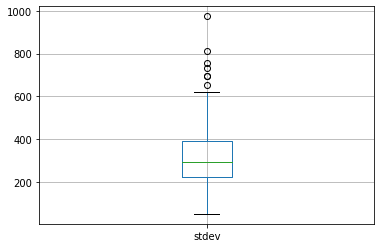

In [13]:
stats_sen.boxplot(column="stdev")

<AxesSubplot:>

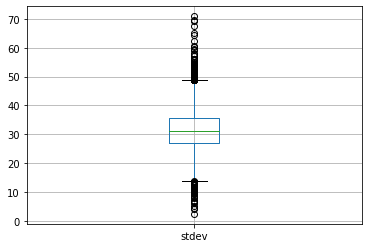

In [14]:
stats_spot.boxplot(column="stdev")